# Analysis for SHE (Semiconductor Hall Effect) Lab

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import csv

side = 10 * 10e-3 # [m]
side_err = 0.01 * 10e-3 # [m]
depth = 1.25 * 10e-3 # [m]
depth_err = 0.01 * 10e-3 # [m]
e = 1.60217663e-19 # [C] (coulombs)

## Full analysis

In [34]:
def f(x):
    return 1/np.cosh(np.log(x)/2.403)

def resistivity_comp(R_AC_BD, R_BD_AC):
    term1 = np.pi * depth / np.log(2)
    term2 = (R_AC_BD + R_BD_AC) / 2
    term3 = f(R_AC_BD/R_BD_AC)
    return term1 * term2 * term3

def exp(T, alpha):
    return (T**alpha)

def zero_interp(x, y):
    sign_changes = np.where(np.diff(np.sign(y)))[0]
    x1, x2 = x[sign_changes], x[sign_changes + 1]
    y1, y2 = y[sign_changes], y[sign_changes + 1]
    return x1 - y1 * (x2 - x1) / (y2 - y1)

In [35]:
cur = 30
allData = np.loadtxt(f'{cur}uA.csv', delimiter='\t', skiprows=4)
allData

array([[ 9.60650000e+01, -4.13500000e+03,  3.00000000e-05, ...,
        -9.80490000e-03, -2.84429000e-02, -2.54997000e-02],
       [ 9.73950000e+01, -3.13500004e+01,  3.00000000e-05, ...,
        -6.35450000e-03, -1.66040000e-03,  1.76700000e-04],
       [ 9.86800000e+01,  4.12000000e+03,  3.00000000e-05, ...,
        -8.88580000e-03,  2.43277000e-02,  2.72926000e-02],
       ...,
       [ 3.48450000e+02, -4.11100000e+03,  3.00000000e-05, ...,
        -8.20100000e-04, -2.17600000e-04, -1.54000000e-05],
       [ 3.49950000e+02, -3.10100002e+01,  3.00000000e-05, ...,
        -7.77100000e-04, -3.10800000e-04, -1.22600000e-04],
       [ 3.51450000e+02,  4.09900000e+03,  3.00000000e-05, ...,
        -7.63600000e-04, -3.99600000e-04, -2.09500000e-04]])

In [36]:
if cur==30:
    allData = np.append(allData[:116, :], allData[117:, :], axis=0)
elif cur == 45:
    allData = allData[22:, :]
elif cur == 75:
    allData = allData[1/allData[:, 0] < 0.011]
elif cur == 90:
    allData = np.append(allData[:150, :], allData[151:, :], axis=0)

temp = allData[:, 0]
field = allData[:, 1]

I_AB = allData[:, 2]
I_AD = allData[:, 3]
I_AC = allData[:, 4]
I_BD = allData[:, 5]
I_AB_neg = allData[:, 6]
I_AD_neg = allData[:, 7]
I_AC_neg = allData[:, 8]
I_BD_neg = allData[:, 9]

V_DC = allData[:, 10] 
V_BC = allData[:, 11] 
V_BD = allData[:, 12] # Hall Voltage
V_AC = allData[:, 13] # Hall Voltage
V_DC_neg = allData[:, 14]
V_BC_neg = allData[:, 15]
V_BD_neg = allData[:, 16] # Hall Voltage
V_AC_neg = allData[:, 17] # Hall Voltage

In [37]:
# R_H will be the average of all hall voltage measurements in hopes they average out
R_ac_bd = V_BD / I_AC
R_ac_bd_neg = V_BD_neg / I_AC_neg
R_bd_ac = V_AC / I_BD
R_bd_ac_neg = V_AC_neg / I_BD_neg

R_pos_avg = (R_ac_bd + R_bd_ac)/2
R_neg_avg = (R_ac_bd_neg + R_bd_ac_neg)/2

V_H_pos = (V_AC + V_BD)/2
V_H_neg = (V_AC_neg + V_BD_neg)/2

R_H_pos = R_pos_avg * depth / field
R_H_neg = R_neg_avg * depth / field

R_ac_bd_avg = (R_ac_bd + R_ac_bd_neg)/2 
R_bd_ac_avg = (R_bd_ac + R_bd_ac_neg)/2
R_diag_avg = (R_ac_bd + R_ac_bd_neg + R_bd_ac + R_bd_ac_neg) / 4

R_H = R_diag_avg * depth / field # Hall coefficient for every field we took data for
V_H = (V_BD - V_BD_neg + V_AC - V_AC_neg)/4
# R_H = R_bd_ac_avg * depth / field


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6h/63mlm7nd01qb3ztqw1gb68jm0000gn/T/ipykernel_72302/3309711961.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"$R_H$ vs. 1/T @ {cur} $\mu$A")


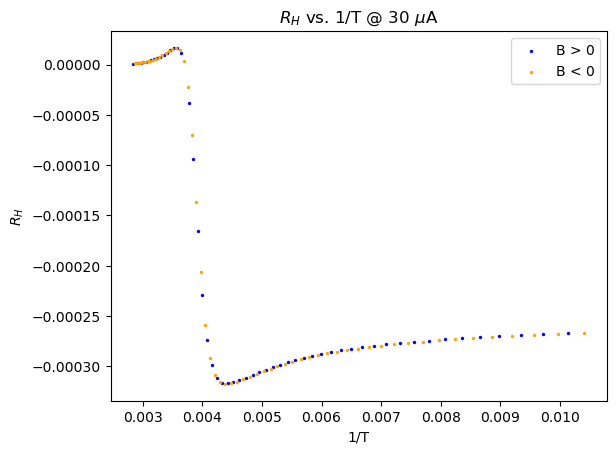

In [38]:
# consider case of B >> 0
pos_B = field > 3000
neg_B = field < -3000
non_zero_B = pos_B | neg_B
zero_B = np.abs(field) < 50
all_B = pos_B | neg_B | zero_B

plt.scatter(1/temp[pos_B], R_H[pos_B], s=2, color="blue", label="B > 0")
plt.scatter(1/temp[neg_B], R_H[neg_B], s=2, color="orange", label="B < 0")

plt.title(f"$R_H$ vs. 1/T @ {cur} $\mu$A")
plt.xlabel("1/T")
plt.ylabel("$R_H$")
plt.legend()
plt.show()
# R_H is negative compared to V so we have a p-type semiconductor


# 1/rho = e(n * mu_n + p * mu_p)
# in intrinsic regime, mu_n = 0 => mu_p = 1/(rho * e * p), we'll compute p by averaging for temps in range [95, 200]
# print(f"in intrinsic regime: p = {p}")
# plt.scatter(temp[(temp < 350) & (non_zero_B)], p[(temp<350) & (non_zero_B)])
# plt.title("p vs. T")
# plt.xlabel("T")
# plt.ylabel("p")
# plt.show()

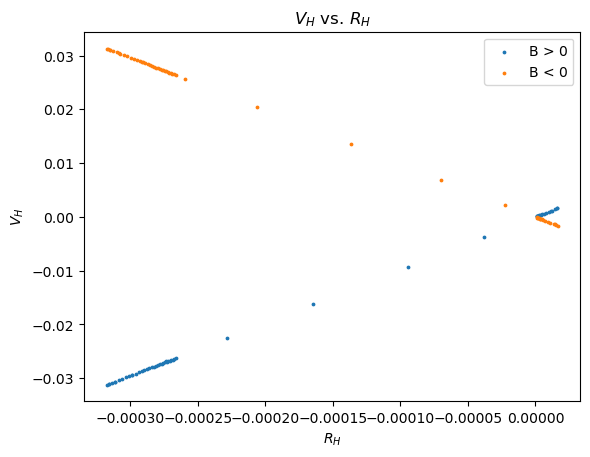

In [39]:
plt.scatter(R_H[pos_B], V_H[pos_B], label = "B > 0", s = 3)
plt.scatter(R_H[neg_B], V_H[neg_B], label = "B < 0", s = 3)

plt.title("$V_H$ vs. $R_H$")
plt.ylabel("$V_H$")
plt.xlabel("$R_H$")
plt.legend()
plt.show()

In [40]:
R_ab_dc = V_DC / I_AB
R_ab_dc_neg = V_DC_neg / I_AB_neg
R_ad_bc = V_BC / I_AD
R_ad_bc_neg = V_BC_neg / I_AD_neg

R_ab_dc_avg = (R_ab_dc + R_ab_dc_neg) / 2
R_ad_bc_avg = (R_ad_bc + R_ad_bc_neg) / 2

resistivity =  resistivity_comp(R_ab_dc_avg, R_ad_bc_avg)

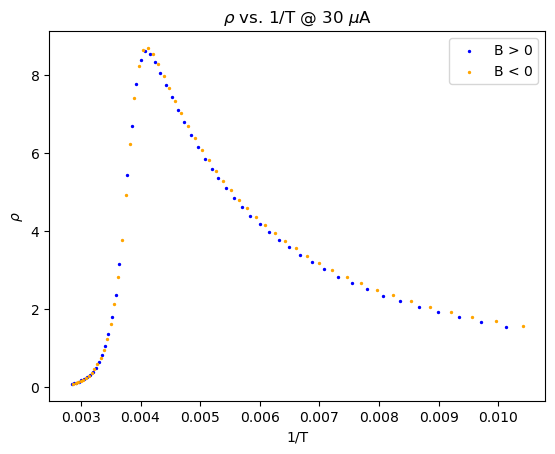

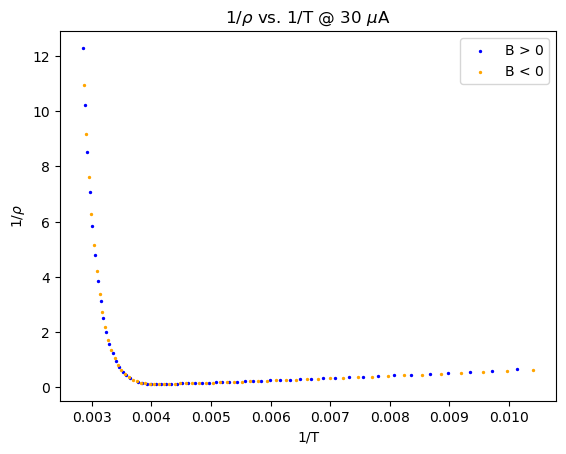

In [41]:
conductivity = 1/resistivity

plt.scatter(1/temp[pos_B], resistivity[pos_B], s=2, color="blue", label="B > 0")
plt.scatter(1/temp[neg_B], resistivity[neg_B], s=2, color="orange", label="B < 0")
plt.title(f"$\\rho$ vs. 1/T @ {cur} $\\mu$A")
plt.xlabel("1/T")
plt.ylabel("$\\rho$")
plt.legend()
plt.show()

plt.scatter(1/temp[pos_B], conductivity[pos_B], s=2, color="blue", label="B > 0")
plt.scatter(1/temp[neg_B], conductivity[neg_B], s=2, color="orange", label="B < 0")
plt.title(f"$1/\\rho$ vs. 1/T @ {cur} $\\mu$A")
plt.xlabel("1/T")
plt.ylabel("$1/\\rho$")
plt.legend()
plt.show()


In [42]:
p = -1/(R_H*e) # computes hole mobility in extrinsic regime 
mu_p = 1 / (resistivity * e * p)

# Perform the curve fitting
fit, cov = opt.curve_fit(exp, temp[(non_zero_B) & (temp<240)], mu_p[(non_zero_B) & (temp<240)])

# Extract fitted parameters
alpha_fit = fit[0]
alpha_err = np.sqrt(np.diag(cov))[0]
print(f"Fitted parameters: alpha = {alpha_fit:1.4f} +/- {alpha_err:1.4f}")

Fitted parameters: alpha = -1.8833 +/- 0.0011


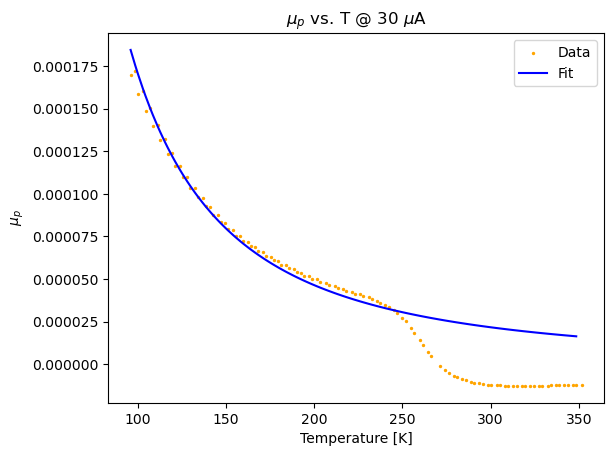

In [43]:
plt.scatter(temp[non_zero_B], mu_p[non_zero_B], s=2, c="orange", label="Data")
plt.plot(temp[(non_zero_B) & (temp<350)], exp(temp[(non_zero_B) & (temp<350)], alpha_fit), c="blue", label="Fit")
# plt.scatter(temp[(non_zero_B) & (temp<250)], mu_p[(non_zero_B) & (temp<250)], color="red")

plt.title(f"$\\mu_p$ vs. T @ {cur} $\\mu$A")
plt.xlabel("Temperature [K]")
plt.ylabel("$\\mu_p$")
# plt.text(250, 0.000150, f"$\\alpha$ = {alpha_fit:.4f} \u00b1 {alpha_err:.4f}", fontsize=12)
plt.legend()
plt.show()

In [44]:
# Deep in extrinsic regime: p = N_a, n = 0, we will average over a few points in the list for p to get N_a
# In the intrinsic regime, p = N_a + N and n = N
# eq 3.12 in Melissinos
N_a = np.average(p[(non_zero_B) & (temp < 200)])
T_zero = zero_interp(temp[non_zero_B], R_H[non_zero_B])[0]

sigma_e = T_zero**alpha_fit * e * N_a
sigma_0 = np.interp(x=T_zero, xp=temp[non_zero_B], fp=1/resistivity[non_zero_B])

b = 1/(1-sigma_e/sigma_0)
n = N_a/(b**2 - 1)

print(b, n)

1.569716039200009 1.5129051751208584e+22


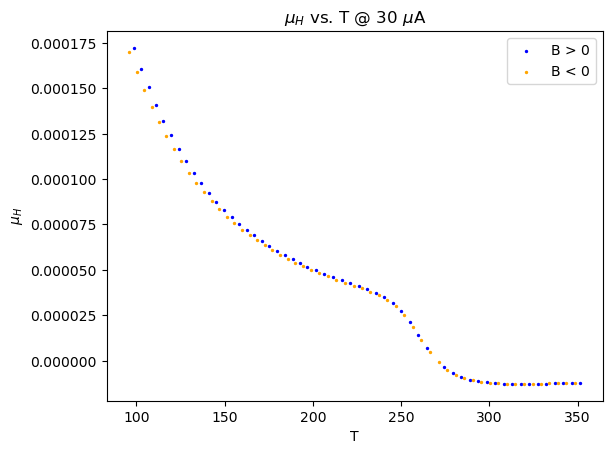

In [45]:
mu_H = -R_H * conductivity
plt.scatter(temp[pos_B], mu_H[pos_B], s=2, c="blue", label="B > 0")
plt.scatter(temp[neg_B], mu_H[neg_B], s=2, c="orange", label="B < 0")

plt.title(f"$\\mu_H$ vs. T @ {cur} $\\mu$A")
plt.ylabel("$\\mu_H$")
plt.xlabel("T")
plt.legend()
plt.show()



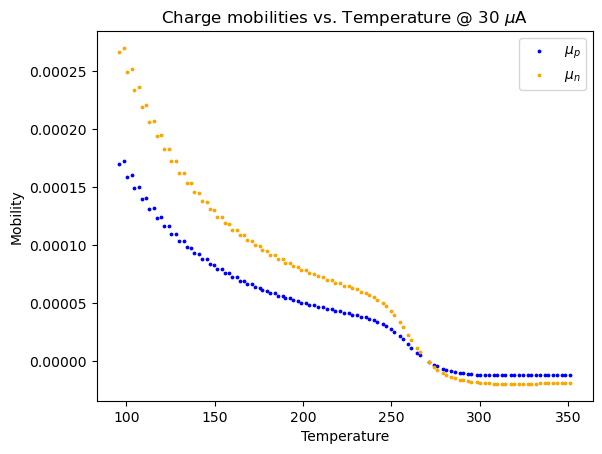

-1.253278725981816e-05 -1.96729171776181e-05


In [46]:
mu_n = b*mu_p

mu_n_avg_ext = np.average(mu_n[(non_zero_B) & (temp > 300)])
mu_p_avg_ext = np.average(mu_p[(non_zero_B) & (temp > 300)])

plt.scatter(temp[non_zero_B], mu_p[non_zero_B], c = "blue", label="$\\mu_p$", s=3)
plt.scatter(temp[non_zero_B], mu_n[non_zero_B], c = "orange", label="$\\mu_n$", s=3)

plt.title(f"Charge mobilities vs. Temperature @ {cur} $\\mu$A")
plt.ylabel("Mobility")
plt.xlabel("Temperature")
plt.legend()
plt.show()
print(mu_p_avg_ext, mu_n_avg_ext)

In [47]:
idx = np.where((temp >= 290) & (temp < 301))[0]

R_H_rt = R_H[idx]
rho_rt = resistivity[idx]
field_rt = field[idx]
pos_B_rt = field_rt > 3000
neg_B_rt = field_rt < -3000
non_zero_B_rt = pos_B_rt | neg_B_rt

print(f"resistivity: {np.mean(rho_rt[non_zero_B_rt])} \n {rho_rt[non_zero_B_rt]}")
print(f"R_H average = {np.mean(R_H_rt[non_zero_B_rt])}\n {R_H_rt[non_zero_B_rt]}")

resistivity: 0.9538402678535917 
 [1.22812344 1.0444134  0.94772781 0.81067001 0.73826668]
R_H average = 1.1035484444737096e-05
 [1.33835543e-05 1.19137290e-05 1.10903285e-05 9.76101895e-06
 9.02879157e-06]


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6h/63mlm7nd01qb3ztqw1gb68jm0000gn/T/ipykernel_72302/1150998694.py:9: SyntaxWarning: invalid escape sequence '\m'
  t = "$R_{AB, DC}$ vs. Temperature @ " + str(cur) + " $\mu$A"


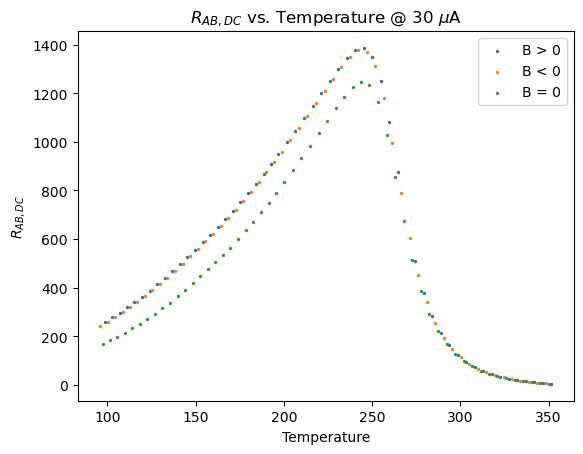

In [48]:
res = R_ab_dc

plt.scatter(temp[pos_B], res[pos_B], label="B > 0", s=2)
plt.scatter(temp[neg_B], res[neg_B], label="B < 0", s=2)
plt.scatter(temp[zero_B], res[zero_B], label="B = 0", s=2)

plt.xlabel("Temperature")
plt.ylabel("$R_{AB, DC}$")
t = "$R_{AB, DC}$ vs. Temperature @ " + str(cur) + " $\mu$A"
plt.title(t)

plt.legend()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6h/63mlm7nd01qb3ztqw1gb68jm0000gn/T/ipykernel_72302/377141219.py:9: SyntaxWarning: invalid escape sequence '\m'
  t = "$R_{AC, BD}$ vs. Temperature @ " + str(cur) + " $\mu$A"


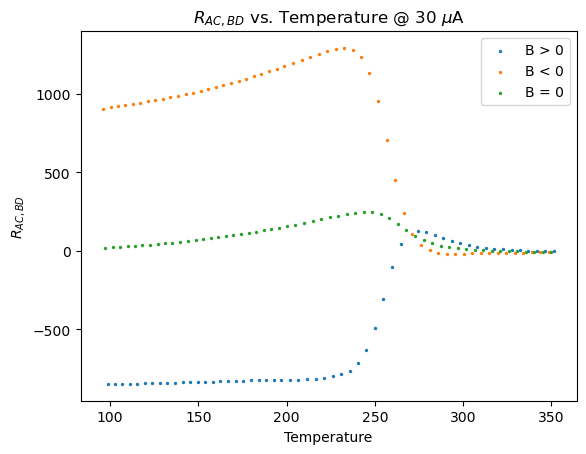

In [49]:
res = R_ac_bd

plt.scatter(temp[pos_B], res[pos_B], label="B > 0", s=2)
plt.scatter(temp[neg_B], res[neg_B], label="B < 0", s=2)
plt.scatter(temp[zero_B], res[zero_B], label="B = 0", s=2)

plt.xlabel("Temperature")
plt.ylabel("$R_{AC, BD}$")
t = "$R_{AC, BD}$ vs. Temperature @ " + str(cur) + " $\mu$A"
plt.title(t)

plt.legend()
plt.show()